In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cross_inh(x, mode=0, thresh=0.5):
    if mode==0:
        return 1.0
    elif mode==1:
        ci = 0.0 if x < thresh else 1.0
        return ci

# EULER INTEGRATION FUNCTIONS:
# noise 0
def pop_evo_eq(pop, q, cimode=0, cithresh=0.5):
    u, x, y = pop[0], pop[1], pop[2]
    dxdt = x*(q*u - y*cross_inh(y,cimode,cithresh))
    dydt = y*(u - q*x*cross_inh(x,cimode,cithresh))
    return [-dxdt-dydt, dxdt, dydt]

# noise type 1
def pop_evo_eq_noise1(pop, q, sig, cimode=0, cithresh=0.5):
    u, x, y = pop[0], pop[1], pop[2]
    dxdt = x*(q*u - y*cross_inh(y,cimode,cithresh)) + sig*(u/2-x)
    dydt = y*(u - q*x*cross_inh(x,cimode,cithresh)) + sig*(u/2-y)
    return [-dxdt-dydt, dxdt, dydt]


def integrate_evo(pop, q, sig, maxTime, cimode, cithresh):
    dt = 1
    pop_evo = [[pop[0], ], [pop[1], ], [pop[2], ]]
    for _ in range(maxTime):
        if sig == 0:
            dpopdt = pop_evo_eq(pop,q,cimode, cithresh)
        else:
            dpopdt = pop_evo_eq_noise1(pop,q,sig,cimode,cithresh)
        pop = [pop+dpopdt*dt for pop,dpopdt in zip(pop,dpopdt)]
        for i in range(3):
            pop_evo[i].append(pop[i])
    return pop_evo

In [31]:
def rk4(y,dx,dydx,qualityRatio):
    y = np.array(y)
    p = np.array(dydx(y,qualityRatio))*dx
    q = np.array(dydx(y+p/2,qualityRatio))*dx
    r = np.array(dydx(y+q/2,qualityRatio))*dx
    s = np.array(dydx(y+r,qualityRatio))*dx
    return y + (p+2*q+2*r+s)/6

In [34]:
# quality ratio:
q = 2
# initial condition
pop = [0.0, 0.5, 0.5]
# integration time:
maxTime = 5000
# timestep:
dt = 1

# noise type 1:
sig = 0.1
# cross inhibition mode:
cimode=0
thresh=0.6

# save time evo:
pop_evo = [[pop[0], ], [pop[1], ], [pop[2], ]]


for _ in range(maxTime):
    # dpopdt = pop_evo_eq(pop,q)
    # dpopdt = pop_evo_eq_noise1(pop,q,sig,cimode)
    # euler:
    # dpopdt = pop_evo_eq(pop,q,cimode)
    # pop = [pop+dpdt*dt for pop,dpdt in zip(pop,dpopdt)]
    # euler millorat:
    # dpopdt = pop_evo_eq(pop,q,cimode)
    # popaux = pop+dpopdt
    # dpopdtaux = pop_evo_eq(pop,q,cimode)
    # pop = [pop+0.5*(dpdt+dpdtaux) for pop,dpdt,dpdtaux in zip(pop,dpopdt,dpopdtaux)]
    # runge kutta 4:
    pop = rk4(pop,1,pop_evo_eq,q)
    for i in range(3):
        pop_evo[i].append(pop[i])

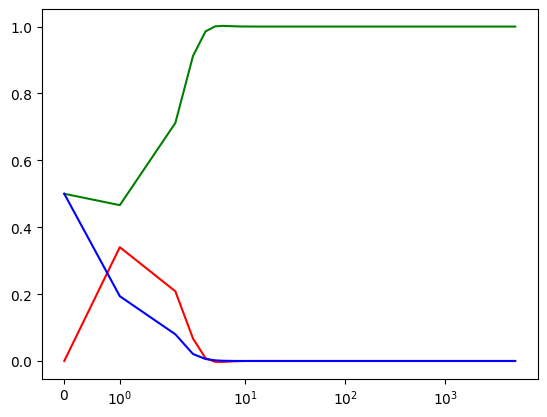

In [35]:
fig, ax = plt.subplots()
ax.set(xscale='symlog')

iters = list(range(maxTime+1))

ax.plot(iters, pop_evo[0], color='r')
ax.plot(iters, pop_evo[1], color='g')
ax.plot(iters, pop_evo[2], color='b')

In [60]:
cimode = 1
maxTime = 10000
# pop = [0.8, 0.1, 0.1]
pop = [0.0, 0.5, 0.5]
q = 1.1
sig = 0.1

threshs = np.arange(0.0, 1.0, 0.1)
stat_pops = [[], [], []]
for th in threshs:
    pop = [0.0, 0.5, 0.5]
    pop_evo = integrate_evo(pop, q, sig, maxTime, cimode, th)
    for i in range(3):
        stat_pops[i].append(pop_evo[i][-1])

stat_pops_ci0 = []
pop = [0.0, 0.5, 0.5]
pop_evo = integrate_evo(pop, q, sig, maxTime, 0, 0)
for i in range(3):
    stat_pops_ci0.append(pop_evo[i][-1])


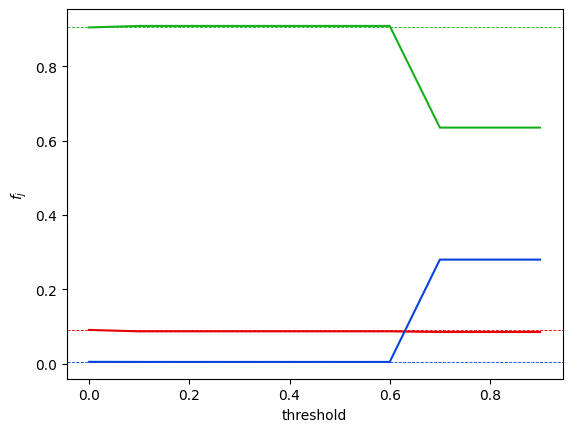

In [61]:
fig, ax = plt.subplots(1,1)
ax.set(xlabel='threshold', ylabel=r'$f_j$')
ax.plot(threshs, stat_pops[0], color='xkcd:red')
ax.plot(threshs, stat_pops[1], color='xkcd:green')
ax.plot(threshs, stat_pops[2], color='xkcd:blue')
ax.axhline(stat_pops_ci0[0], ls='--', lw=0.6, color='xkcd:red')
ax.axhline(stat_pops_ci0[1], ls='--', lw=0.6, color='xkcd:green')
ax.axhline(stat_pops_ci0[2], ls='--', lw=0.6, color='xkcd:blue')